# This Script contains the following:
### 1. Importing of Libraries
### 2. Make a Subset of Data
### 3. Create Line Chart with Data
### 4. Decompose the Data's Components

### 1. Importing of Libraries

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

In [2]:
warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

In [3]:
plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [4]:
# define path
path =r"C:\Users\repla\Documents"

In [5]:
#Importing Data Set
df = pd.read_csv(r"C:\Users\repla\Documents\Exercise 6\2 - Data\Prepared Data\gun_violence_data_cleaned2.csv", index_col = False)

In [6]:
# Configure API key 

quandl.ApiConfig.api_key = 'yourAPIkey'

In [7]:
df.head()

,Unnamed: 0,incident_id,date,state,n_participants,n_killed,n_injured,victims,suspects,adult,teen,child,killed,injured,arrested,unharmed
0,0,461105,2013-01-01,Pennsylvania,5,0,4,4,1,True,False,False,False,True,True,False
1,1,460726,2013-01-01,California,5,1,3,4,1,True,False,False,True,True,False,False
2,2,478855,2013-01-01,Ohio,5,1,3,3,2,True,False,False,True,True,True,True
3,3,478925,2013-01-05,Colorado,4,4,0,3,1,True,False,False,True,False,False,False
4,4,478959,2013-01-07,North Carolina,4,2,2,3,1,True,True,False,True,True,False,False


### 2. Make a Subset of Data

In [8]:
#create subset of data using date, state, n_participants, n_killed, n_injured, victims, and suspects

In [9]:
subset = df[['date', 'state', 'n_participants', 'n_killed', 'n_injured', 'victims', 'suspects']]

In [10]:
subset.head()

,date,state,n_participants,n_killed,n_injured,victims,suspects
0,2013-01-01,Pennsylvania,5,0,4,4,1
1,2013-01-01,California,5,1,3,4,1
2,2013-01-01,Ohio,5,1,3,3,2
3,2013-01-05,Colorado,4,4,0,3,1
4,2013-01-07,North Carolina,4,2,2,3,1


In [11]:
subset.shape

(186929, 7)

In [16]:
# Reset the index to move the 'date' index back to a column
subset.reset_index(inplace=True)

### 3. Create Line Chart with Data

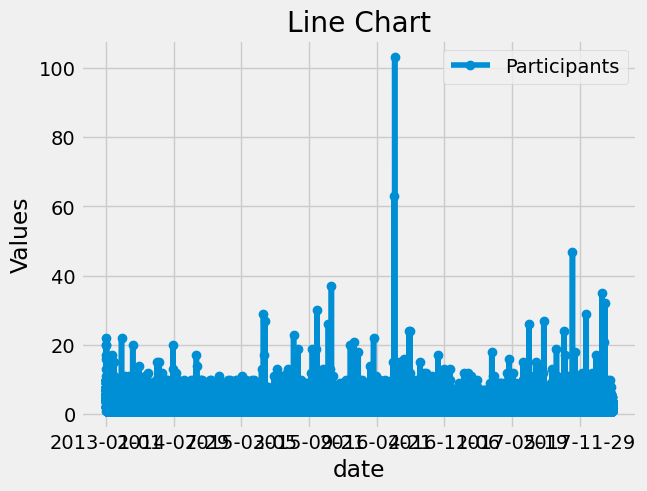

<Figure size 1500x500 with 0 Axes>

In [19]:
# Create a line chart
subset.plot(x='date', y=['n_participants'], marker='o')
plt.title('Line Chart')
plt.xlabel('date')
plt.ylabel('Values')
plt.legend(['Participants'])
plt.figure(figsize=(15,5), dpi=100)
plt.show()

In [25]:
# Filter the data for the specified date range
start_date = '2013-01-01'
end_date = '2013-01-31'
filtered_subset = subset[(subset['date'] >= start_date) & (subset['date'] <= end_date)]

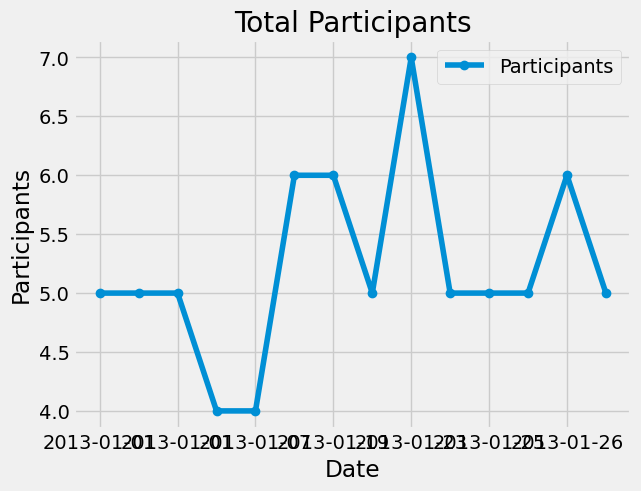

<Figure size 1500x500 with 0 Axes>

In [26]:
# Create the line chart with the filtered data
import matplotlib.pyplot as plt
filtered_subset.plot(x='date', y=['n_participants'], marker='o')
plt.title('Total Participants')
plt.xlabel('Date')
plt.ylabel('Participants')
plt.legend(['Participants'])
plt.figure(figsize=(15,5), dpi=100)
plt.show()

### 4. Decompose the Data's Components

In [40]:
subset.head()

,date,state,n_participants,n_killed,n_injured,victims,suspects
0,2013-01-01,Pennsylvania,5,0,4,4,1
1,2013-01-01,California,5,1,3,4,1
2,2013-01-01,Ohio,5,1,3,3,2
3,2013-01-05,Colorado,4,4,0,3,1
4,2013-01-07,North Carolina,4,2,2,3,1


In [41]:
# Remove the 'state' column from the DataFrame
subset = subset.drop('state', axis=1)

In [42]:
subset.head()

,date,n_participants,n_killed,n_injured,victims,suspects
0,2013-01-01,5,0,4,4,1
1,2013-01-01,5,1,3,4,1
2,2013-01-01,5,1,3,3,2
3,2013-01-05,4,4,0,3,1
4,2013-01-07,4,2,2,3,1


In [43]:
# Filter the data for the specified date range
start_date = '2013-01-01'
end_date = '2013-01-31'
jan_subset = subset[(subset['date'] >= start_date) & (subset['date'] <= end_date)]

In [44]:
decomposition = sm.tsa.seasonal_decompose(jan_subset, model='additive')

ValueError: could not convert string to float: '2013-01-01'

In [45]:
# Convert the 'date' column to datetime format
jan_subset['date'] = pd.to_datetime(jan_subset['date'])

In [46]:
# Set the 'date' column as the index
jan_subset.set_index('date', inplace=True)

In [49]:
# Convert the index to a datetime index
jan_subset.index = pd.to_datetime(jan_subset.index)

In [50]:
# Infer the most likely frequency for the index
freq = pd.infer_freq(jan_subset.index)
print(freq)

None


In [54]:
jan_subset = jan_subset.groupby(level=0).mean()

In [55]:
jan_subset = jan_subset.asfreq('D')

In [56]:
decomposition = sm.tsa.seasonal_decompose(jan_subset, model='additive')

ValueError: This function does not handle missing values

In [57]:
# Fill missing values using forward fill
jan_subset_filled = jan_subset.ffill()

In [58]:
# Run seasonal decomposition on the filled data
decomposition = sm.tsa.seasonal_decompose(jan_subset_filled, model='additive')

TypeError: Index(...) must be called with a collection of some kind, 'seasonal' was passed

In [59]:
# Run seasonal decomposition on the filled data
result = sm.tsa.seasonal_decompose(jan_subset_filled, model='additive')


TypeError: Index(...) must be called with a collection of some kind, 'seasonal' was passed